In [51]:
import numpy as np
import matplotlib.pyplot as plt
import random
from typing import Tuple

In [8]:
# Train paths
kmnist_train_images = "./kmnist-train-imgs.npz"
kmnist_train_labels = "./kmnist-train-labels.npz"

# Test paths
kmnist_test_images = "./kmnist-test-imgs.npz"
kmnist_test_labels = "./kmnist-test-labels.npz"

In [21]:
# Initial look at the data

X_train = np.load(kmnist_train_images)["arr_0"]
y_train = np.load(kmnist_train_labels)["arr_0"]

X_test = np.load(kmnist_test_images)["arr_0"]
y_test = np.load(kmnist_test_labels)["arr_0"]

print("Data Overview")
print("---------------------------------")
print(f"X_train type: {type(X_train)}")
print(f"X_train dtype: {X_train.dtype}")
print(f"X_train shape: {X_train.shape}")
print(f"X_train ndim: {X_train.ndim}")
print("---------------------------------")
print(f"y_train type: {type(y_train)}")
print(f"y_train dtype: {y_train.dtype}")
print(f"y_train shape: {y_train.shape}")
print(f"y_train ndim: {y_train.ndim}")
print("---------------------------------")
print(f"X_test_raw type: {type(X_test)}")
print(f"X_test_raw dtype: {X_test.dtype}")
print(f"X_test_raw shape: {X_test.shape}")
print(f"X_test_raw ndim: {X_test.ndim}")
print("---------------------------------")
print(f"y_test type: {type(y_test)}")
print(f"y_test dtype: {y_test.dtype}")
print(f"y_test shape: {y_test.shape}")
print(f"y_test ndim: {y_test.ndim}")

Data Overview
---------------------------------
X_train type: <class 'numpy.ndarray'>
X_train dtype: uint8
X_train shape: (60000, 28, 28)
X_train ndim: 3
---------------------------------
y_train type: <class 'numpy.ndarray'>
y_train dtype: uint8
y_train shape: (60000,)
y_train ndim: 1
---------------------------------
X_test_raw type: <class 'numpy.ndarray'>
X_test_raw dtype: uint8
X_test_raw shape: (10000, 28, 28)
X_test_raw ndim: 3
---------------------------------
y_test type: <class 'numpy.ndarray'>
y_test dtype: uint8
y_test shape: (10000,)
y_test ndim: 1


In [26]:
# KMNIST DataLoader Class

class DataLoader:
    """
    A DataLoader class that loads KMNIST data from .npz files for images and labels.
    Each .npz contains "arr_0".
    """
    def __init__(self, train_images_path: str, train_labels_path: str, test_images_path: str, test_labels_path: str):
        self.train_images_path = train_images_path
        self.train_labels_path = train_labels_path
        self.test_images_path = test_images_path
        self.test_labels_path = test_labels_path

    def load_data(self) -> Tuple[Tuple[np.ndarray, np.ndarray], Tuple[np.ndarray, np.ndarray]]:
        """
        Loads arrays from the given .npz files.
        
        Returns:
            (Tuple[np.array]): Returns a tuple of numpy arrays.
        """
        X_train = np.load(self.train_images_path)["arr_0"]
        y_train = np.load(self.train_labels_path)["arr_0"]

        X_test = np.load(self.test_images_path)["arr_0"]
        y_test = np.load(self.test_labels_path)["arr_0"]

        return (X_train, y_train), (X_test, y_test)


In [27]:
# Loading the data 
loader = DataLoader(kmnist_train_images, kmnist_train_labels, kmnist_test_images, kmnist_test_labels)

(X_train, y_train), (X_test, y_test) = loader.load_data()

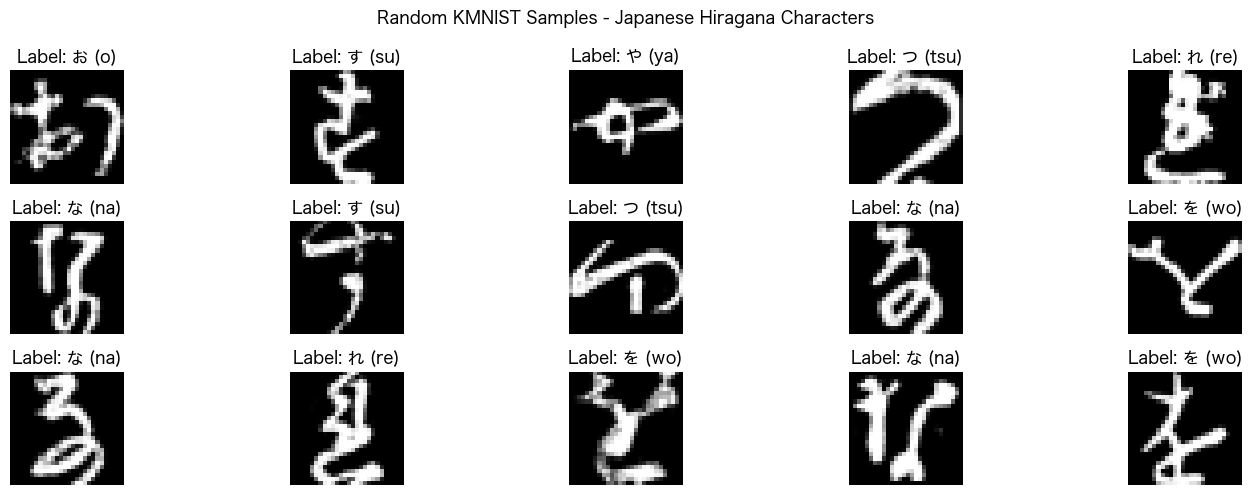

In [58]:
# Set font that supports Japanese characters since DejaVu Sans does not support it.
plt.rcParams["font.family"] = "Hiragino Sans"

kmnist_classes = {
    0: "お (o)",
    1: "き (ki)",
    2: "す (su)",
    3: "つ (tsu)",
    4: "な (na)",
    5: "は (ha)",
    6: "ま (ma)",
    7: "や (ya)",
    8: "れ (re)",
    9: "を (wo)"
}

# Plot some Hiragana Characters randomly.
fig, axes = plt.subplots(3, 5, figsize=(15, 5))
for _, ax in enumerate(axes.flat):
    rand_idx = random.randint(0, X_train.shape[0] - 1)
    ax.imshow(X_train[rand_idx], cmap="gray")
    label_index = y_train[rand_idx]
    ax.set_title(f"Label: {kmnist_classes[label_index]}")
    ax.axis("off")

plt.suptitle("Random KMNIST Samples - Japanese Hiragana Characters")
plt.tight_layout()
plt.show();